In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('/content/AB_NYC_2019.csv')
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [43]:
df.groupby("host_id")["reviews_per_month"].nunique()

host_id
2438         1
2571         1
2787         6
2845         2
2868         1
            ..
274273284    0
274298453    0
274307600    0
274311461    0
274321313    0
Name: reviews_per_month, Length: 37457, dtype: int64

In [45]:
def custom_agg(series):
    num_reviews_gt_zero = series[series > 0]
    if num_reviews_gt_zero.empty:
        return 0
    else:
        return num_reviews_gt_zero.mean()


result = df.groupby("host_id")["reviews_per_month"].agg(custom_agg)

result = result.fillna(0)

In [18]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [19]:
neighbourhood_group = pd.get_dummies(df['neighbourhood_group'], drop_first = True)
neighbourhood_group.head()

,Brooklyn,Manhattan,Queens,Staten Island
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [21]:
room_type_group = pd.get_dummies(df['room_type'], drop_first = True)
room_type_group.head()

,Private room,Shared room
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0


In [22]:
df = pd.concat([df, neighbourhood_group, room_type_group], axis = 1)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Brooklyn,Manhattan,Queens,Staten Island,Private room,Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,2018-10-19,0.21,6,365,1,0,0,0,1,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,2019-05-21,0.38,2,355,0,1,0,0,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,NaN,NaN,1,365,0,1,0,0,1,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,2019-07-05,4.64,1,194,1,0,0,0,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,2018-11-19,0.10,1,0,0,1,0,0,0,0


In [24]:
df['reviews_per_month'].fillna(0, inplace=True)
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
Brooklyn                              0
Manhattan                             0
Queens                                0
Staten Island                         0
Private room                          0
Shared room                           0
dtype: int64

In [25]:
df.drop(['id', 'host_id','neighbourhood_group','name','host_name', 'availability_365','neighbourhood','room_type','last_review'], axis=1, inplace=True)
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,Brooklyn,Manhattan,Queens,Staten Island,Private room,Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,1,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,0,1,0,0,0,0
2,40.80902,-73.94190,150,3,0,0.00,1,0,1,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.64,1,1,0,0,0,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,1,0,0,0,0


In [26]:
X = df.drop('price', axis=1)

y = df['price']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()

In [31]:
lm.fit(X_train, y_train)

LinearRegression()

In [32]:
print(lm.intercept_)

-17380.058019892094


In [33]:
predictions = lm.predict(X_test)
predictions

array([ 34.43655759,  59.79924408, 171.65960422, ..., 261.17927809,
       178.47031052,  90.29626026])

In [34]:
from sklearn.metrics import classification_report

In [35]:
predictions = lm.predict(X_test)

In [36]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficent'])
coeff_df

,Coefficent
latitude,-276.889899
longitude,-390.531427
minimum_nights,0.133937
number_of_reviews,-0.160879
reviews_per_month,-1.506871
calculated_host_listings_count,0.008074
Brooklyn,-50.566196
Manhattan,18.838365
Queens,-17.921421
Staten Island,-147.371625


Text(0, 0.5, 'predictions')

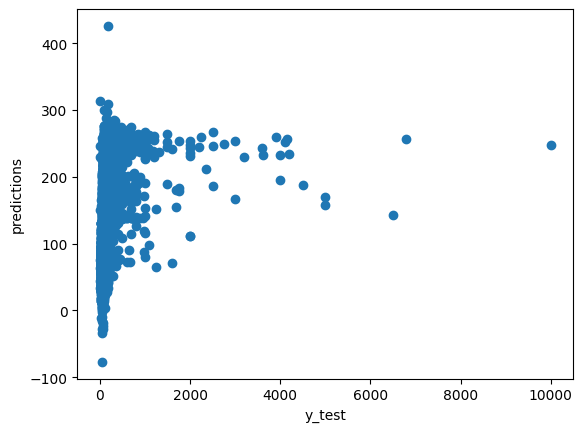

In [37]:
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')

<ipython-input-39-8c748beb4090>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


<Axes: xlabel='price', ylabel='Density'>

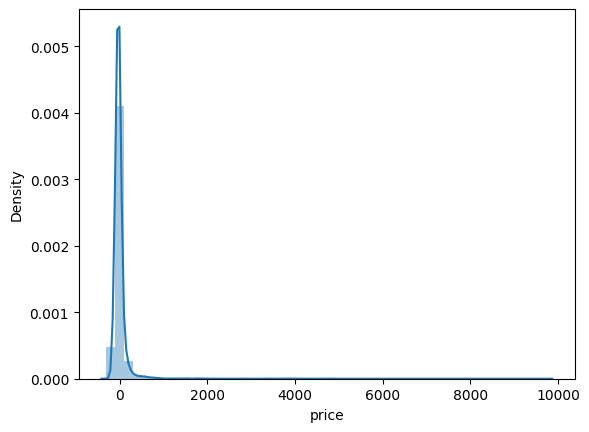

In [39]:
sns.distplot((y_test-predictions),bins=50)